In [4]:

'''
load the result of aggregate_greedy.py
'''
# To visualize the greedy result starting for 31 ROIs, in total 25 subjects.
import os
os.chdir("/gpfs/milgram/project/turk-browne/projects/rtTest/kp_scratch/")
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle5 as pickle
import subprocess
import numpy as np
import os
print(f"conda env={os.environ['CONDA_DEFAULT_ENV']}") 
import numpy as np
import nibabel as nib
import sys
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
import itertools
import subprocess
from subprocess import call
import warnings
warnings.filterwarnings("ignore")

workingDir="/gpfs/milgram/project/turk-browne/projects/rtTest/"
def logit(p):
    return np.log(p/(1-p))
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
roiloc="schaefer2018"
dataSource="neurosketch"
subjects_correctly_aligned=['1206161','0119173','1206162','1130161','1206163','0120171','0111171','1202161','0125172','0110172','0123173','0120173','0110171','0119172','0124171','0123171','1203161','0118172','0118171','0112171','1207162','0117171','0119174','0112173','0112172']
subjects=subjects_correctly_aligned
N=78
workingPath="/gpfs/milgram/project/turk-browne/projects/rtTest/"
GreedyBestAcc=np.zeros((len(subjects),N+1))
GreedyBestAcc[GreedyBestAcc==0]=None
GreedyBestAcc={}
numberOfROIs={}
tag="GM"
for ii,subject in enumerate(subjects):
    # try:
    #     GreedyBestAcc[ii,N]=np.load(workingPath+"./{}/{}/output/uniMaskRanktag2_top{}.npy".format(roiloc, subject, N))
    # except:
    #     pass
    t=np.load(workingPath+f"./{roiloc}/{subject}/output/uniMaskRank_{tag}_top{N}.npy")
    GreedyBestAcc[subject]=[np.float(t)]
    numberOfROIs[subject]=[N]
    # for len_topN_1 in range(N-1,0,-1):
    for len_topN in range(1,N):
        # Wait(f"./tmp/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}.pkl")
        try:
            # {当前的被试}_{greedy开始的ROI数目，也就是25}_{mask的种类schaefer2018}_{数据来源neurosketch}_{当前的 megaROI 包含有的数目}
            di = load_obj(f"./tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len_topN}")
            GreedyBestAcc[subject].append(np.float(di['bestAcc']))
            numberOfROIs[subject].append(len_topN)
            # GreedyBestAcc[ii,len_topN] = di['bestAcc']
        except:
            pass

conda env=/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud


In [5]:

'''
find the best performed ROI for each subject and display the accuracy of each subject, save the best performed ROI as chosenMask
'''
#find best ID for each subject
bestID={}
for ii,subject in enumerate(subjects):
    t=GreedyBestAcc[subject]
    bestID[subject] = numberOfROIs[subject][np.where(t==np.nanmax(t))[0][0]] #bestID 指的是每一个subject对应的最好的megaROI包含的ROI的数目
chosenMask={}
for subject in bestID:
    # best ID  
    # {当前的被试}_{greedy开始的ROI数目，也就是25}_{mask的种类schaefer2018}_{数据来源neurosketch}_{最好的megaROI 包含有的数目}
    di = load_obj(f"./tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{bestID[subject]}")
    chosenMask[subject] = di['bestROIs']
    print(f"di['bestROIs']={di['bestROIs']}")


di['bestROIs']=('GM_19.nii.gz', 'GM_225.nii.gz', 'GM_86.nii.gz', 'GM_159.nii.gz', 'GM_65.nii.gz', 'GM_235.nii.gz', 'GM_108.nii.gz', 'GM_76.nii.gz', 'GM_166.nii.gz', 'GM_271.nii.gz', 'GM_164.nii.gz', 'GM_80.nii.gz', 'GM_89.nii.gz', 'GM_21.nii.gz', 'GM_126.nii.gz', 'GM_58.nii.gz', 'GM_93.nii.gz', 'GM_67.nii.gz', 'GM_209.nii.gz', 'GM_230.nii.gz', 'GM_265.nii.gz', 'GM_220.nii.gz', 'GM_263.nii.gz', 'GM_246.nii.gz', 'GM_243.nii.gz')
di['bestROIs']=('GM_234.nii.gz', 'GM_19.nii.gz', 'GM_86.nii.gz', 'GM_240.nii.gz', 'GM_114.nii.gz', 'GM_65.nii.gz', 'GM_284.nii.gz', 'GM_139.nii.gz', 'GM_295.nii.gz', 'GM_258.nii.gz', 'GM_80.nii.gz', 'GM_89.nii.gz', 'GM_41.nii.gz', 'GM_132.nii.gz', 'GM_249.nii.gz', 'GM_49.nii.gz', 'GM_190.nii.gz', 'GM_93.nii.gz', 'GM_67.nii.gz', 'GM_265.nii.gz', 'GM_52.nii.gz', 'GM_146.nii.gz', 'GM_238.nii.gz', 'GM_263.nii.gz', 'GM_150.nii.gz', 'GM_281.nii.gz', 'GM_244.nii.gz', 'GM_30.nii.gz', 'GM_79.nii.gz')
di['bestROIs']=('GM_234.nii.gz', 'GM_86.nii.gz', 'GM_240.nii.gz', 'GM_14

In [6]:

def getMask(topN, subject):
    workingDir="/gpfs/milgram/project/turk-browne/projects/rtTest/"
    for pn, parc in enumerate(topN):
        _mask = nib.load(workingDir+"/{}/{}/{}".format(roiloc, subject, parc))
        aff = _mask.affine
        _mask = _mask.get_data()
        _mask = _mask.astype(int)
        # say some things about the mask.
        mask = _mask if pn == 0 else mask + _mask
        mask[mask>0] = 1
    return mask

for sub in chosenMask:
    mask=getMask(chosenMask[sub], sub)
    # if not os.path.exists(f"{workingDir}/{roiloc}/{sub}/chosenMask.npy"):
    np.save(f"{workingDir}/{roiloc}/{sub}/chosenMask_{tag}",mask)
    


In [7]:

from scipy.stats import zscore
def normalize(X):
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

def mkdir(folder):
    if not os.path.isdir(folder):
        os.mkdir(folder)

'''
calculate the evidence floor and ceil for each subject and display different forms of evidences.
'''
def morphingTarget(subject,testRun=6):
    '''
    purpose:
        get the morphing target function
    steps:
        load train clf
        load brain data and behavior data
        get the morphing target function
            evidence_floor is C evidence for CD classifier(can also be D evidence for CD classifier)
            evidence_ceil  is A evidence in AC and AD classifier
    '''

    import os
    import numpy as np
    import pandas as pd
    import joblib
    import nibabel as nib


    phasedict = dict(zip([1,2,3,4,5,6],["12", "12", "34", "34", "56", "56"]))
    imcodeDict={"A": "bed", "B": "Chair", "C": "table", "D": "bench"}
    if 'milgram' in os.getcwd():
        main_dir='/gpfs/milgram/project/turk-browne/projects/rtTest/'
    else:
        main_dir='/Users/kailong/Desktop/rtTest'

    working_dir=main_dir
    os.chdir(working_dir)

    funcdata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/{sub}_neurosketch/data/nifti/realtime_preprocessed/{sub}_neurosketch_recognition_run_{run}.nii.gz"
    metadata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/data/features/recog/metadata_{sub}_V1_{phase}.csv"

    metas = []

    run=testRun
    print(run, end='--')
    # retrieve from the dictionary which phase it is, assign the session
    phase = phasedict[run]
    ses = 1
    
    # Build the path for the preprocessed functional data
    this4d = funcdata.format(ses=ses, run=run, phase=phase, sub=subject)
    
    # Read in the metadata, and reduce it to only the TR values from this run, add to a list
    thismeta = pd.read_csv(metadata.format(ses=ses, run=run, phase=phase, sub=subject))
    if dataSource == "neurosketch":
        _run = 1 if run % 2 == 0 else 2
    else:
        _run = run
    thismeta = thismeta[thismeta['run_num'] == int(_run)]
    
    if dataSource == "realtime":
        TR_num = list(thismeta.TR.astype(int))
        labels = list(thismeta.Item)
        labels = [imcodeDict[label] for label in labels]
    else:
        TR_num = list(thismeta.TR_num.astype(int))
        labels = list(thismeta.label)
    
    print("LENGTH OF TR: {}".format(len(TR_num)))
    # Load the functional data
    runIm = nib.load(this4d)
    affine_mat = runIm.affine
    runImDat = runIm.get_fdata()
    
    # Use the TR numbers to select the correct features
    features = [runImDat[:,:,:,n+3] for n in TR_num]
    features = np.array(features)
    chosenMask = np.load(f"/gpfs/milgram/project/turk-browne/projects/rtTest/schaefer2018/{subject}/chosenMask_{tag}.npy")
    features = features[:, chosenMask==1]
    print("shape of features", features.shape, "shape of mask", mask.shape)
    # featmean = features.mean(1).mean(1).mean(1)[..., None,None,None] #features.mean(1)[..., None]
    # features = features - featmean
    # features = features - features.mean(0)
    features = normalize(features)
    # features = np.expand_dims(features, 0)
    
    # Append both so we can use it later
    # metas.append(labels)
    # metas['label']

    t=pd.DataFrame()
    t['label']=labels
    t["run_num"]=run
    behav_data=t
    
    runs = features

    
    dimsize = runIm.header.get_zooms()
    
    brain_data = runs
    print(brain_data.shape)
    print(behav_data.shape)
    FEAT=brain_data
    print(f"FEAT.shape={FEAT.shape}")
    META=behav_data

    # convert item colume to label colume
    imcodeDict={
    'A': 'bed',
    'B': 'chair',
    'C': 'table',
    'D': 'bench'}


    # def classifierEvidence(clf,X,Y):
    #     ID=np.where((clf.classes_==Y)*1==1)[0][0]
    #     Evidence=(X@clf.coef_.T+clf.intercept_) if ID==1 else (-(X@clf.coef_.T+clf.intercept_))
    #     # Evidence=(X@clf.coef_.T+clf.intercept_) if ID==0 else (-(X@clf.coef_.T+clf.intercept_))
    #     return np.asarray(Evidence)

    # def classifierEvidence(clf,X,Y):
    #     ID=np.where((clf.classes_==Y)*1==1)[0][0]
    #     p = clf.predict_proba(X)[:,ID]
    #     BX=np.log(p/(1-p))
    #     return BX

    def classifierProb(clf,X,Y):
        ID=np.where((clf.classes_==Y)*1==1)[0][0]
        p = clf.predict_proba(X)[:,ID]
        return p

    A_ID = (META['label']=='bed')
    X = FEAT[A_ID]


    model_folder = f"{working_dir}{roiloc}/{subject}/clf/"

    store="\n"
    print("floor")
    # D evidence for AD_clf when A is presented.
    Y = 'bench'
    AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
    AD_D_evidence = classifierProb(AD_clf,X,Y)
    evidence_floor = np.mean(AD_D_evidence)
    print(f"D evidence for AD_clf when A is presented={evidence_floor}")
    store=store+f"D evidence for AD_clf when A is presented={evidence_floor}"

    # C evidence for AC_clf when A is presented.
    Y = 'table'
    AC_clf=joblib.load(model_folder +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
    AC_C_evidence = classifierProb(AC_clf,X,Y)
    evidence_floor = np.mean(AC_C_evidence)
    print(f"C evidence for AC_clf when A is presented={evidence_floor}")
    store=store+"\n"+f"C evidence for AC_clf when A is presented={evidence_floor}"

    # D evidence for CD_clf when A is presented.
    Y = 'bench'
    CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    CD_D_evidence = classifierProb(CD_clf,X,Y)
    evidence_floor1 = np.mean(CD_D_evidence)
    print(f"D evidence for CD_clf when A is presented={evidence_floor1}")
    store=store+"\n"+f"D evidence for CD_clf when A is presented={evidence_floor1}"

    # C evidence for CD_clf when A is presented.
    Y = 'table'
    CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    CD_C_evidence = classifierProb(CD_clf,X,Y)
    evidence_floor2 = np.mean(CD_C_evidence)
    print(f"C evidence for CD_clf when A is presented={evidence_floor2}")
    store=store+"\n"+f"C evidence for CD_clf when A is presented={evidence_floor2}"

    # set floor to be 0, (aka before inverting is 0.5) and only estimate ceiling # edited 03152021
    evidence_floor = 0.5 #max(evidence_floor1,evidence_floor2)
    store=store+f"\nmax(evidence_floor1,evidence_floor2)={evidence_floor} unique_Mark"


    print("ceil")
    store=store+"\n"+"ceil"
    # evidence_ceil  is A evidence in AC and AD classifier
    Y = 'bed'
    AC_clf=joblib.load(model_folder +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
    AC_A_evidence = classifierProb(AC_clf,X,Y)
    evidence_ceil1 = AC_A_evidence
    print(f"A evidence in AC_clf when A is presented={np.mean(evidence_ceil1)}")
    store=store+"\n"+f"A evidence in AC_clf when A is presented={np.mean(evidence_ceil1)}"

    Y = 'bed'
    AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
    AD_A_evidence = classifierProb(AD_clf,X,Y)
    evidence_ceil2 = AD_A_evidence
    print(f"A evidence in AD_clf when A is presented={np.mean(evidence_ceil2)}")
    store=store+"\n"+f"A evidence in AD_clf when A is presented={np.mean(evidence_ceil2)}"

    # evidence_ceil = np.mean(evidence_ceil1)
    # evidence_ceil = np.mean(evidence_ceil2)
    evidence_ceil = np.mean((evidence_ceil1+evidence_ceil2)/2)
    print(f"evidence_ceil={evidence_ceil} uniqueMark")
    store=store+f"\nevidence_ceil={evidence_ceil} uniqueMark"

    # ceil,floor=logit(evidence_ceil),logit(evidence_floor)
    # mu = (ceil+floor)/2
    # sig = (ceil-floor)/2.3548
    # print(f"floor={floor}, ceil={ceil}")
    # print(f"mu={mu}, sig={sig}")

    # store=store+"\n"+f"floor={floor}, ceil={ceil}"
    # store=store+"\n"+f"mu={mu}, sig={sig}"


    # BC_clf=joblib.load(model_folder +'benchchair_chairtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    # BD_clf=joblib.load(model_folder +'bedchair_chairbench.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    # Y = 'chair'
    # # imcodeDict={
    # # 'A': 'bed',
    # # 'B': 'chair',
    # # 'C': 'table',
    # # 'D': 'bench'}
    # print(f"classifierProb(BC_clf,FEAT,Y)={classifierProb(BC_clf,FEAT,Y)}")
    # print(f"classifierProb(BD_clf,FEAT,Y)={classifierProb(BD_clf,FEAT,Y)}")


    # # # convert item colume to label colume
    # # imcodeDict={
    # # 'A': 'bed',
    # # 'B': 'chair',
    # # 'C': 'table',
    # # 'D': 'bench'}
    # def testMorphParamFor(A): #A='bed''chair'...
    #     A_ID = (META['label']==A)
    #     X = FEAT[A_ID]


    #     # 这里的X是选择的testRun里面的所有的展示A的trials
    #     BC_B_evidence = classifierProb(BC_clf,X,Y)
    #     BD_B_evidence = classifierProb(BD_clf,X,Y)
    #     print(f"BC_B_evidence={BC_B_evidence}")
    #     print(f"BD_B_evidence={BD_B_evidence}")
    #     B_evidence = (BC_B_evidence+BD_B_evidence)/2
    #     print(f"B_evidence={B_evidence}")
    #     print(f"mu={mu}, sig={sig}")
        



    #     def gaussian(x, mu, sig):
    #         # mu and sig is determined before each neurofeedback session using 2 recognition runs.
    #         return np.round(1+18*(1 - np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))) # map from (-∞,∞) -> [1,19]
    #     morphParam=np.mean(gaussian(B_evidence, mu, sig))
    #     # B_evidences.append(B_evidence)
    #     print(f"morphParam={morphParam}")
    #     return f"morphParam for {A} = {morphParam}"

    # store=store+"\n"+testMorphParamFor('bed')
    # store=store+"\n"+testMorphParamFor('chair')
    # store=store+"\n"+testMorphParamFor('table')
    # store=store+"\n"+testMorphParamFor('bench')

    return evidence_floor, evidence_ceil,store



'''
load the functional and behavior data and choseMask and train all possible pairs of 2way classifiers
''' 
def minimalClass(subject):
    # subject=subjects[1]
    '''
    purpose: 
        train offline models

    steps:
        load preprocessed and aligned behavior and brain data 
        select data with the wanted pattern like AB AC AD BC BD CD 
        train correspondng classifier and save the classifier performance and the classifiers themselves.

    '''

    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import sklearn
    import joblib
    import nibabel as nib
    import itertools
    from sklearn.linear_model import LogisticRegression

    def gaussian(x, mu, sig):
        # mu and sig is determined before each neurofeedback session using 2 recognition runs.
        return round(1+18*(1 - np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))) # map from (0,1) -> [1,19]

    def jitter(size,const=0):
        jit = np.random.normal(0+const, 0.05, size)
        X = np.zeros((size))
        X = X + jit
        return X

    def other(target):
        other_objs = [i for i in ['bed', 'bench', 'chair', 'table'] if i not in target]
        return other_objs

    def red_vox(n_vox, prop=0.1):
        return int(np.ceil(n_vox * prop))

    def get_inds(X, Y, pair, testRun=None):

        inds = {}

        # return relative indices
        if testRun:
            trainIX = Y.index[(Y['label'].isin(pair)) & (Y['run_num'] != int(testRun))]
        else:
            trainIX = Y.index[(Y['label'].isin(pair))]

        # pull training and test data
        trainX = X[trainIX]
        trainY = Y.iloc[trainIX].label

        # Main classifier on 5 runs, testing on 6th
        clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                multi_class='multinomial').fit(trainX, trainY)
        B = clf.coef_[0]  # pull betas

        # retrieve only the first object, then only the second object
        if testRun:
            obj1IX = Y.index[(Y['label'] == pair[0]) & (Y['run_num'] != int(testRun))]
            obj2IX = Y.index[(Y['label'] == pair[1]) & (Y['run_num'] != int(testRun))]
        else:
            obj1IX = Y.index[(Y['label'] == pair[0])]
            obj2IX = Y.index[(Y['label'] == pair[1])]

        # Get the average of the first object, then the second object
        obj1X = np.mean(X[obj1IX], 0)
        obj2X = np.mean(X[obj2IX], 0)

        # Build the importance map
        mult1X = obj1X * B
        mult2X = obj2X * B

        # Sort these so that they are from least to most important for a given category.
        sortmult1X = mult1X.argsort()[::-1]
        sortmult2X = mult2X.argsort()

        # add to a dictionary for later use
        inds[clf.classes_[0]] = sortmult1X
        inds[clf.classes_[1]] = sortmult2X

        return inds

    if 'milgram' in os.getcwd():
        main_dir='/gpfs/milgram/project/turk-browne/projects/rtTest/'
    else:
        main_dir='/Users/kailong/Desktop/rtTest'

    working_dir=main_dir
    os.chdir(working_dir)

    objects = ['bed', 'bench', 'chair', 'table']


    if dataSource == "neurosketch":
        funcdata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/{sub}_neurosketch/data/nifti/realtime_preprocessed/{sub}_neurosketch_recognition_run_{run}.nii.gz"
        metadata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/data/features/recog/metadata_{sub}_V1_{phase}.csv"
        anat = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/{sub}_neurosketch/data/nifti/{sub}_neurosketch_anat_mprage_brain.nii.gz"
    elif dataSource == "realtime":
        funcdata = "/gpfs/milgram/project/turk-browne/projects/rtcloud_kp/subjects/{sub}/ses{ses}_recognition/run0{run}/nifti/{sub}_functional.nii.gz"
        metadata = "/gpfs/milgram/project/turk-browne/projects/rtcloud_kp/subjects/{sub}/ses{ses}_recognition/run0{run}/{sub}_0{run}_preprocessed_behavData.csv"
        anat = "$TO_BE_FILLED"
    else:
        funcdata = "/gpfs/milgram/project/turk-browne/projects/rtTest/searchout/feat/{sub}_pre.nii.gz"
        metadata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/data/features/recog/metadata_{sub}_V1_{phase}.csv"
        anat = "$TO_BE_FILLED"

    # print('mask dimensions: {}'. format(mask.shape))
    # print('number of voxels in mask: {}'.format(np.sum(mask)))
    phasedict = dict(zip([1,2,3,4,5,6],["12", "12", "34", "34", "56", "56"]))
    imcodeDict={"A": "bed", "B": "Chair", "C": "table", "D": "bench"}
    chosenMask = np.load(f"/gpfs/milgram/project/turk-browne/projects/rtTest/schaefer2018/{subject}/chosenMask_{tag}.npy")
    print(f"np.sum(chosenMask)={np.sum(chosenMask)}")
    # Compile preprocessed data and corresponding indices
    metas = []
    for run in range(1, 7):
        print(run, end='--')
        # retrieve from the dictionary which phase it is, assign the session
        phase = phasedict[run]
        
        # Build the path for the preprocessed functional data
        this4d = funcdata.format(run=run, phase=phase, sub=subject)
        
        # Read in the metadata, and reduce it to only the TR values from this run, add to a list
        thismeta = pd.read_csv(metadata.format(run=run, phase=phase, sub=subject))
        if dataSource == "neurosketch":
            _run = 1 if run % 2 == 0 else 2
        else:
            _run = run
        thismeta = thismeta[thismeta['run_num'] == int(_run)]
        
        if dataSource == "realtime":
            TR_num = list(thismeta.TR.astype(int))
            labels = list(thismeta.Item)
            labels = [imcodeDict[label] for label in labels]
        else:
            TR_num = list(thismeta.TR_num.astype(int))
            labels = list(thismeta.label)
        
        print("LENGTH OF TR: {}".format(len(TR_num)))
        # Load the functional data
        runIm = nib.load(this4d)
        affine_mat = runIm.affine
        runImDat = runIm.get_fdata()
        
        # Use the TR numbers to select the correct features
        features = [runImDat[:,:,:,n+3] for n in TR_num] # here shape is from (94, 94, 72, 240) to (80, 94, 94, 72)
        features = np.array(features)
        features = features[:, chosenMask==1]
        print("shape of features", features.shape, "shape of chosenMask", chosenMask.shape)
        features = normalize(features)
        # features = np.expand_dims(features, 0)
        
        # Append both so we can use it later
        # metas.append(labels)
        # metas['label']

        t=pd.DataFrame()
        t['label']=labels
        t["run_num"]=run
        behav_data=t if run==1 else pd.concat([behav_data,t])
        
        runs = features if run == 1 else np.concatenate((runs, features))

    dimsize = runIm.header.get_zooms()
    brain_data = runs
    print(brain_data.shape)
    print(behav_data.shape)
    FEAT=brain_data
    print(f"FEAT.shape={FEAT.shape}")
    META=behav_data

    def Class(brain_data,behav_data):
        accs = []
        for run in range(1,7):
            trainIX = behav_data['run_num']!=int(run)
            testIX = behav_data['run_num']==int(run)

            trainX =  brain_data[trainIX]
            trainY =  behav_data.iloc[np.asarray(trainIX)].label

            testX =  brain_data[testIX]
            testY =  behav_data.iloc[np.asarray(testIX)].label

            clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                    multi_class='multinomial').fit(trainX, trainY)

            # Monitor progress by printing accuracy (only useful if you're running a test set)
            acc = clf.score(testX, testY)
            accs.append(acc)
        accs
        return np.mean(accs)
    accs=Class(brain_data,behav_data)
    print(f"new trained 4 way classifier accuracy={accs}")


    # convert item colume to label colume
    imcodeDict={
    'A': 'bed',
    'B': 'chair',
    'C': 'table',
    'D': 'bench'}

    # Which run to use as test data (leave as None to not have test data)
    accs_rotation_container={}
    evidence_rotation_container={}
    for testRun in range(1,7):
        # testRun = 6 # when testing: testRun = 2 ; META['run_num'].iloc[:5]=2

        # Decide on the proportion of crescent data to use for classification
        include = 1
        objects = ['bed', 'bench', 'chair', 'table']
        allpairs = itertools.combinations(objects,2)
        accs={}
        # Iterate over all the possible target pairs of objects
        for pair in allpairs:
            # Find the control (remaining) objects for this pair
            altpair = other(pair)

            # pull sorted indices for each of the critical objects, in order of importance (low to high)
            # inds = get_inds(FEAT, META, pair, testRun=testRun)

            # Find the number of voxels that will be left given your inclusion parameter above
            # nvox = red_vox(FEAT.shape[1], include)

            for obj in pair:
                # foil = [i for i in pair if i != obj][0]
                for altobj in altpair:

                    # establish a naming convention where it is $TARGET_$CLASSIFICATION
                    # Target is the NF pair (e.g. bed/bench)
                    # Classificationis is btw one of the targets, and a control (e.g. bed/chair, or bed/table, NOT bed/bench)
                    naming = '{}{}_{}{}'.format(pair[0], pair[1], obj, altobj)

                    # Pull the relevant inds from your previously established dictionary 
                    # obj_inds = inds[obj]

                    # If you're using testdata, this function will split it up. Otherwise it leaves out run as a parameter
                    # if testRun:
                    #     trainIX = META.index[(META['label'].isin([obj, altobj])) & (META['run_num'] != int(testRun))]
                    #     testIX = META.index[(META['label'].isin([obj, altobj])) & (META['run_num'] == int(testRun))]
                    # else:
                    #     trainIX = META.index[(META['label'].isin([obj, altobj]))]
                    #     testIX = META.index[(META['label'].isin([obj, altobj]))]
                    # # pull training and test data
                    # trainX = FEAT[trainIX]
                    # testX = FEAT[testIX]
                    # trainY = META.iloc[trainIX].label
                    # testY = META.iloc[testIX].label

                    # print(f"obj={obj},altobj={altobj}")
                    # print(f"unique(trainY)={np.unique(trainY)}")
                    # print(f"unique(testY)={np.unique(testY)}")
                    # assert len(np.unique(trainY))==2

                    # for testRun in range(6):
                    if testRun:
                        trainIX = ((META['label']==obj) + (META['label']==altobj)) * (META['run_num']!=int(testRun))
                        testIX = ((META['label']==obj) + (META['label']==altobj)) * (META['run_num']==int(testRun))
                    else:
                        trainIX = ((META['label']==obj) + (META['label']==altobj))
                        testIX = ((META['label']==obj) + (META['label']==altobj))
                    # pull training and test data
                    trainX = FEAT[trainIX]
                    testX = FEAT[testIX]
                    trainY = META.iloc[np.asarray(trainIX)].label
                    testY = META.iloc[np.asarray(testIX)].label

                    # print(f"obj={obj},altobj={altobj}")
                    # print(f"unique(trainY)={np.unique(trainY)}")
                    # print(f"unique(testY)={np.unique(testY)}")
                    assert len(np.unique(trainY))==2

                    # # If you're selecting high-importance features, this bit handles that
                    # if include < 1:
                    #     trainX = trainX[:, obj_inds[-nvox:]]
                    #     testX = testX[:, obj_inds[-nvox:]]

                    # Train your classifier
                    clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                            multi_class='multinomial').fit(trainX, trainY)


                    model_folder = f"{working_dir}{roiloc}/{subject}/clf/"
                    mkdir(model_folder)
                    # Save it for later use
                    joblib.dump(clf, model_folder +'/{}.joblib'.format(naming))

                    # Monitor progress by printing accuracy (only useful if you're running a test set)
                    acc = clf.score(testX, testY)
                    # print(naming, acc)
                    accs[naming]=acc
        accs_rotation_container[testRun] = accs
        evidence_rotation_container[testRun] = morphingTarget(subject,testRun=testRun)
    # for testRun in range(1,7):
    #     t=np.mean(list(accs_rotation_container[testRun].values()))
    #     print(f"testRun {testRun} mean testing accracy={t}")
    #     print(evidence_rotation_container[testRun][2])
    def getString(string,searchFor,end):
        return string.split(searchFor)[1].split(end)[0]
    # getString(string,searchFor)

    # floors=[]
    # ceils=[]
    # for testRun in range(1,7):
    #     t=np.mean(list(accs_rotation_container[testRun].values()))
    #     print(f"testRun {testRun} mean testing accracy={t}")
    #     # print(evidence_rotation_container[testRun][2])
    #     t=np.float(getString(evidence_rotation_container[testRun][2],"\nmax(evidence_floor1,evidence_floor2)="," unique_Mark"))
    #     print("floor=",t)
    #     floors.append(t)
        
    #     t=np.float(getString(evidence_rotation_container[testRun][2],"\nevidence_ceil="," uniqueMark"))
    #     print("ceiling=",t)
    #     ceils.append(t)
    #     print()
    #     print()
    # print(np.mean(floors))
    # print(np.mean(ceils))

    # _=plt.figure()
    # _=plt.hist(list(accs.values()))
    return accs_rotation_container , evidence_rotation_container



    


# subject= '0119173' #sys.argv[1]
# sub_id = [i for i,x in enumerate(subjects) if x == subject][0]





def subLoop(subject):
    accs_rotation_container , evidence_rotation_container = minimalClass(subject)
    # print("best 4way classifier accuracy = ",GreedyBestAcc[subject][bestID[subject]])
    # data['best 4way classifier accuracy']=GreedyBestAcc[subject][bestID[subject]]
    # for acc in accs:
    #     print(acc,accs[acc])
    # # data["accs"]=accs
    # # floor, ceil,store = morphingTarget(subject,testRun=6)
    # # data["store testing run"]=store
    # # floor, ceil,store = morphingTarget(subject,testRun=1)
    # # data["store training run"]=store
    
    # save_obj(store,f"./{subject}store")
    return accs_rotation_container , evidence_rotation_container



In [11]:

from tqdm import tqdm
data={}
for subject in tqdm(subjects):
    print("best 4way classifier accuracy = ",GreedyBestAcc[subject][bestID[subject]])
    data[subject]=subLoop(subject)


  0%|          | 0/25 [00:00<?, ?it/s]

best 4way classifier accuracy =  0.3958333333333333
np.sum(chosenMask)=8204
1--LENGTH OF TR: 80
shape of features (80, 8204) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 8204) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 8204) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 8204) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 8204) shape of chosenMask (94, 94, 72)
6--LENGTH OF TR: 80
shape of features (80, 8204) shape of chosenMask (94, 94, 72)
(480, 8204)
(480, 2)
FEAT.shape=(480, 8204)
new trained 4 way classifier accuracy=0.3958333333333333
1--LENGTH OF TR: 80
shape of features (80, 8204) shape of mask (94, 94, 72)
(80, 8204)
(80, 2)
FEAT.shape=(80, 8204)
floor
D evidence for AD_clf when A is presented=0.6178330658130943
C evidence for AC_clf when A is presented=0.5823164851328133
D evidence for CD_clf when A is presented=0.4732363999502458
C evidence for CD_clf whe

  4%|▍         | 1/25 [01:25<34:07, 85.32s/it]

shape of features (80, 8204) shape of mask (94, 94, 72)
(80, 8204)
(80, 2)
FEAT.shape=(80, 8204)
floor
D evidence for AD_clf when A is presented=0.43853002196494284
C evidence for AC_clf when A is presented=0.4703452508235732
D evidence for CD_clf when A is presented=0.4860036469000601
C evidence for CD_clf when A is presented=0.51399635309994
ceil
A evidence in AC_clf when A is presented=0.5296547491764269
A evidence in AD_clf when A is presented=0.5614699780350572
evidence_ceil=0.5455623636057421 uniqueMark
best 4way classifier accuracy =  0.36250000000000004
np.sum(chosenMask)=7209
1--LENGTH OF TR: 80
shape of features (80, 7209) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 7209) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 7209) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 7209) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 7209) shape of chosenMask (94, 94, 72

  8%|▊         | 2/25 [02:34<29:00, 75.69s/it]

shape of features (80, 7209) shape of mask (94, 94, 72)
(80, 7209)
(80, 2)
FEAT.shape=(80, 7209)
floor
D evidence for AD_clf when A is presented=0.5034415403745328
C evidence for AC_clf when A is presented=0.47597373377376284
D evidence for CD_clf when A is presented=0.5432667942361019
C evidence for CD_clf when A is presented=0.45673320576389803
ceil
A evidence in AC_clf when A is presented=0.5240262662262374
A evidence in AD_clf when A is presented=0.4965584596254672
evidence_ceil=0.5102923629258522 uniqueMark
best 4way classifier accuracy =  0.41250000000000003
np.sum(chosenMask)=8554
1--LENGTH OF TR: 80
shape of features (80, 8554) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 8554) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 8554) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 8554) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 8554) shape of chosenMask (94, 94,

 12%|█▏        | 3/25 [03:54<28:27, 77.63s/it]

shape of features (80, 8554) shape of mask (94, 94, 72)
(80, 8554)
(80, 2)
FEAT.shape=(80, 8554)
floor
D evidence for AD_clf when A is presented=0.4648606143032777
C evidence for AC_clf when A is presented=0.49720810198523574
D evidence for CD_clf when A is presented=0.48582889498464993
C evidence for CD_clf when A is presented=0.5141711050153501
ceil
A evidence in AC_clf when A is presented=0.5027918980147643
A evidence in AD_clf when A is presented=0.5351393856967224
evidence_ceil=0.5189656418557432 uniqueMark
best 4way classifier accuracy =  0.37083333333333335
np.sum(chosenMask)=5739
1--LENGTH OF TR: 80
shape of features (80, 5739) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 5739) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 5739) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 5739) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 5739) shape of chosenMask (94, 94,

 16%|█▌        | 4/25 [05:06<26:28, 75.66s/it]

shape of features (80, 5739) shape of mask (94, 94, 72)
(80, 5739)
(80, 2)
FEAT.shape=(80, 5739)
floor
D evidence for AD_clf when A is presented=0.45831399244323806
C evidence for AC_clf when A is presented=0.5364963920159566
D evidence for CD_clf when A is presented=0.44192844440027035
C evidence for CD_clf when A is presented=0.5580715555997295
ceil
A evidence in AC_clf when A is presented=0.4635036079840435
A evidence in AD_clf when A is presented=0.541686007556762
evidence_ceil=0.5025948077704027 uniqueMark
best 4way classifier accuracy =  0.38125000000000003
np.sum(chosenMask)=4591
1--LENGTH OF TR: 80
shape of features (80, 4591) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 4591) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 4591) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 4591) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 4591) shape of chosenMask (94, 94, 

 20%|██        | 5/25 [06:05<23:10, 69.51s/it]

shape of features (80, 4591) shape of mask (94, 94, 72)
(80, 4591)
(80, 2)
FEAT.shape=(80, 4591)
floor
D evidence for AD_clf when A is presented=0.4198876969950877
C evidence for AC_clf when A is presented=0.5249902470048126
D evidence for CD_clf when A is presented=0.42311886943888616
C evidence for CD_clf when A is presented=0.5768811305611139
ceil
A evidence in AC_clf when A is presented=0.4750097529951874
A evidence in AD_clf when A is presented=0.5801123030049123
evidence_ceil=0.5275610280000498 uniqueMark
best 4way classifier accuracy =  0.3833333333333333
np.sum(chosenMask)=6051
1--LENGTH OF TR: 80
shape of features (80, 6051) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 6051) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 6051) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 6051) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 6051) shape of chosenMask (94, 94, 7

 24%|██▍       | 6/25 [07:12<21:42, 68.57s/it]

shape of features (80, 6051) shape of mask (94, 94, 72)
(80, 6051)
(80, 2)
FEAT.shape=(80, 6051)
floor
D evidence for AD_clf when A is presented=0.5058295471552625
C evidence for AC_clf when A is presented=0.45327646212825473
D evidence for CD_clf when A is presented=0.5267917832810843
C evidence for CD_clf when A is presented=0.4732082167189156
ceil
A evidence in AC_clf when A is presented=0.5467235378717452
A evidence in AD_clf when A is presented=0.49417045284473743
evidence_ceil=0.5204469953582413 uniqueMark
best 4way classifier accuracy =  0.36041666666666666
np.sum(chosenMask)=8996
1--LENGTH OF TR: 80
shape of features (80, 8996) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 8996) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 8996) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 8996) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 8996) shape of chosenMask (94, 94,

 28%|██▊       | 7/25 [08:35<22:01, 73.40s/it]

shape of features (80, 8996) shape of mask (94, 94, 72)
(80, 8996)
(80, 2)
FEAT.shape=(80, 8996)
floor
D evidence for AD_clf when A is presented=0.4566516868404009
C evidence for AC_clf when A is presented=0.45512357736542075
D evidence for CD_clf when A is presented=0.491057925212956
C evidence for CD_clf when A is presented=0.5089420747870439
ceil
A evidence in AC_clf when A is presented=0.5448764226345792
A evidence in AD_clf when A is presented=0.543348313159599
evidence_ceil=0.5441123678970893 uniqueMark
best 4way classifier accuracy =  0.36874999999999997
np.sum(chosenMask)=7928
1--LENGTH OF TR: 80
shape of features (80, 7928) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 7928) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 7928) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 7928) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 7928) shape of chosenMask (94, 94, 72

 32%|███▏      | 8/25 [10:06<22:24, 79.08s/it]

shape of features (80, 7928) shape of mask (94, 94, 72)
(80, 7928)
(80, 2)
FEAT.shape=(80, 7928)
floor
D evidence for AD_clf when A is presented=0.4204058039611443
C evidence for AC_clf when A is presented=0.4210193893071844
D evidence for CD_clf when A is presented=0.4872477300001493
C evidence for CD_clf when A is presented=0.5127522699998507
ceil
A evidence in AC_clf when A is presented=0.5789806106928156
A evidence in AD_clf when A is presented=0.5795941960388558
evidence_ceil=0.5792874033658356 uniqueMark
best 4way classifier accuracy =  0.4041666666666666
np.sum(chosenMask)=7854
1--LENGTH OF TR: 80
shape of features (80, 7854) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 7854) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 7854) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 7854) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 7854) shape of chosenMask (94, 94, 72

 36%|███▌      | 9/25 [11:30<21:29, 80.58s/it]

shape of features (80, 7854) shape of mask (94, 94, 72)
(80, 7854)
(80, 2)
FEAT.shape=(80, 7854)
floor
D evidence for AD_clf when A is presented=0.4925166269094607
C evidence for AC_clf when A is presented=0.448537482179663
D evidence for CD_clf when A is presented=0.5403054374224354
C evidence for CD_clf when A is presented=0.4596945625775645
ceil
A evidence in AC_clf when A is presented=0.551462517820337
A evidence in AD_clf when A is presented=0.5074833730905393
evidence_ceil=0.5294729454554382 uniqueMark
best 4way classifier accuracy =  0.3583333333333334
np.sum(chosenMask)=5764
1--LENGTH OF TR: 80
shape of features (80, 5764) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 5764) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 5764) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 5764) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 5764) shape of chosenMask (94, 94, 72)


 40%|████      | 10/25 [12:39<19:14, 76.98s/it]

shape of features (80, 5764) shape of mask (94, 94, 72)
(80, 5764)
(80, 2)
FEAT.shape=(80, 5764)
floor
D evidence for AD_clf when A is presented=0.4560529655845166
C evidence for AC_clf when A is presented=0.5404883413993601
D evidence for CD_clf when A is presented=0.4635493492221022
C evidence for CD_clf when A is presented=0.5364506507778978
ceil
A evidence in AC_clf when A is presented=0.45951165860063997
A evidence in AD_clf when A is presented=0.5439470344154834
evidence_ceil=0.5017293465080617 uniqueMark
best 4way classifier accuracy =  0.4208333333333334
np.sum(chosenMask)=10724
1--LENGTH OF TR: 80
shape of features (80, 10724) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 10724) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 10724) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 10724) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 10724) shape of chosenMask (94,

 44%|████▍     | 11/25 [14:19<19:38, 84.15s/it]

shape of features (80, 10724) shape of mask (94, 94, 72)
(80, 10724)
(80, 2)
FEAT.shape=(80, 10724)
floor
D evidence for AD_clf when A is presented=0.48789021977140645
C evidence for AC_clf when A is presented=0.4302345780746323
D evidence for CD_clf when A is presented=0.5497790772439637
C evidence for CD_clf when A is presented=0.4502209227560364
ceil
A evidence in AC_clf when A is presented=0.5697654219253677
A evidence in AD_clf when A is presented=0.5121097802285937
evidence_ceil=0.5409376010769807 uniqueMark
best 4way classifier accuracy =  0.3541666666666667
np.sum(chosenMask)=2204
1--LENGTH OF TR: 80
shape of features (80, 2204) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 2204) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 2204) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 2204) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 2204) shape of chosenMask (94, 94

 48%|████▊     | 12/25 [15:16<16:23, 75.62s/it]

shape of features (80, 2204) shape of mask (94, 94, 72)
(80, 2204)
(80, 2)
FEAT.shape=(80, 2204)
floor
D evidence for AD_clf when A is presented=0.45457393410818614
C evidence for AC_clf when A is presented=0.33379818875654854
D evidence for CD_clf when A is presented=0.5703231440005652
C evidence for CD_clf when A is presented=0.4296768559994346
ceil
A evidence in AC_clf when A is presented=0.6662018112434513
A evidence in AD_clf when A is presented=0.5454260658918139
evidence_ceil=0.6058139385676327 uniqueMark
best 4way classifier accuracy =  0.3583333333333334
np.sum(chosenMask)=10638
1--LENGTH OF TR: 80
shape of features (80, 10638) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 10638) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 10638) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 10638) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 10638) shape of chosenMask (94

 52%|█████▏    | 13/25 [16:55<16:32, 82.68s/it]

shape of features (80, 10638) shape of mask (94, 94, 72)
(80, 10638)
(80, 2)
FEAT.shape=(80, 10638)
floor
D evidence for AD_clf when A is presented=0.5405376192560017
C evidence for AC_clf when A is presented=0.5254431250773837
D evidence for CD_clf when A is presented=0.4894910538327185
C evidence for CD_clf when A is presented=0.5105089461672816
ceil
A evidence in AC_clf when A is presented=0.47455687492261633
A evidence in AD_clf when A is presented=0.45946238074399826
evidence_ceil=0.46700962783330724 uniqueMark
best 4way classifier accuracy =  0.3854166666666667
np.sum(chosenMask)=2826
1--LENGTH OF TR: 80
shape of features (80, 2826) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 2826) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 2826) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 2826) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 2826) shape of chosenMask (94, 

 56%|█████▌    | 14/25 [17:50<13:39, 74.52s/it]

shape of features (80, 2826) shape of mask (94, 94, 72)
(80, 2826)
(80, 2)
FEAT.shape=(80, 2826)
floor
D evidence for AD_clf when A is presented=0.44568543561054363
C evidence for AC_clf when A is presented=0.38792248968426213
D evidence for CD_clf when A is presented=0.6091793403516906
C evidence for CD_clf when A is presented=0.3908206596483094
ceil
A evidence in AC_clf when A is presented=0.612077510315738
A evidence in AD_clf when A is presented=0.5543145643894565
evidence_ceil=0.5831960373525972 uniqueMark
best 4way classifier accuracy =  0.36874999999999997
np.sum(chosenMask)=5674
1--LENGTH OF TR: 80
shape of features (80, 5674) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 5674) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 5674) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 5674) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 5674) shape of chosenMask (94, 94, 

 60%|██████    | 15/25 [18:54<11:52, 71.29s/it]

shape of features (80, 5674) shape of mask (94, 94, 72)
(80, 5674)
(80, 2)
FEAT.shape=(80, 5674)
floor
D evidence for AD_clf when A is presented=0.4907046161593477
C evidence for AC_clf when A is presented=0.5491631520977587
D evidence for CD_clf when A is presented=0.4602360953011021
C evidence for CD_clf when A is presented=0.5397639046988979
ceil
A evidence in AC_clf when A is presented=0.45083684790224127
A evidence in AD_clf when A is presented=0.5092953838406523
evidence_ceil=0.4800661158714469 uniqueMark
best 4way classifier accuracy =  0.3875
np.sum(chosenMask)=9754
1--LENGTH OF TR: 80
shape of features (80, 9754) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 9754) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 9754) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 9754) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 9754) shape of chosenMask (94, 94, 72)
6--LENGTH

 64%|██████▍   | 16/25 [20:23<11:28, 76.49s/it]

shape of features (80, 9754) shape of mask (94, 94, 72)
(80, 9754)
(80, 2)
FEAT.shape=(80, 9754)
floor
D evidence for AD_clf when A is presented=0.47774715812721597
C evidence for AC_clf when A is presented=0.5081242722993765
D evidence for CD_clf when A is presented=0.47157336858089594
C evidence for CD_clf when A is presented=0.5284266314191041
ceil
A evidence in AC_clf when A is presented=0.4918757277006236
A evidence in AD_clf when A is presented=0.5222528418727841
evidence_ceil=0.5070642847867038 uniqueMark
best 4way classifier accuracy =  0.3791666666666667
np.sum(chosenMask)=9864
1--LENGTH OF TR: 80
shape of features (80, 9864) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 9864) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 9864) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 9864) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 9864) shape of chosenMask (94, 94, 

 68%|██████▊   | 17/25 [21:54<10:48, 81.06s/it]

shape of features (80, 9864) shape of mask (94, 94, 72)
(80, 9864)
(80, 2)
FEAT.shape=(80, 9864)
floor
D evidence for AD_clf when A is presented=0.4557798708807841
C evidence for AC_clf when A is presented=0.4944701932738463
D evidence for CD_clf when A is presented=0.4516684123651782
C evidence for CD_clf when A is presented=0.5483315876348218
ceil
A evidence in AC_clf when A is presented=0.5055298067261538
A evidence in AD_clf when A is presented=0.5442201291192159
evidence_ceil=0.5248749679226848 uniqueMark
best 4way classifier accuracy =  0.38958333333333334
np.sum(chosenMask)=14461
1--LENGTH OF TR: 80
shape of features (80, 14461) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 14461) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 14461) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 14461) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 14461) shape of chosenMask (94,

 72%|███████▏  | 18/25 [24:12<11:27, 98.17s/it]

shape of features (80, 14461) shape of mask (94, 94, 72)
(80, 14461)
(80, 2)
FEAT.shape=(80, 14461)
floor
D evidence for AD_clf when A is presented=0.4823239358568994
C evidence for AC_clf when A is presented=0.45506471233504603
D evidence for CD_clf when A is presented=0.5097542450440413
C evidence for CD_clf when A is presented=0.49024575495595873
ceil
A evidence in AC_clf when A is presented=0.544935287664954
A evidence in AD_clf when A is presented=0.5176760641431006
evidence_ceil=0.5313056759040273 uniqueMark
best 4way classifier accuracy =  0.36874999999999997
np.sum(chosenMask)=3999
1--LENGTH OF TR: 80
shape of features (80, 3999) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 3999) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 3999) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 3999) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 3999) shape of chosenMask (94, 9

 76%|███████▌  | 19/25 [25:16<08:47, 87.97s/it]

shape of features (80, 3999) shape of mask (94, 94, 72)
(80, 3999)
(80, 2)
FEAT.shape=(80, 3999)
floor
D evidence for AD_clf when A is presented=0.567941140735314
C evidence for AC_clf when A is presented=0.3775064557335762
D evidence for CD_clf when A is presented=0.653478774271204
C evidence for CD_clf when A is presented=0.3465212257287962
ceil
A evidence in AC_clf when A is presented=0.6224935442664238
A evidence in AD_clf when A is presented=0.4320588592646861
evidence_ceil=0.5272762017655549 uniqueMark
best 4way classifier accuracy =  0.37916666666666665
np.sum(chosenMask)=5657
1--LENGTH OF TR: 80
shape of features (80, 5657) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 5657) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 5657) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 5657) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 5657) shape of chosenMask (94, 94, 72)

 80%|████████  | 20/25 [26:27<06:53, 82.60s/it]

shape of features (80, 5657) shape of mask (94, 94, 72)
(80, 5657)
(80, 2)
FEAT.shape=(80, 5657)
floor
D evidence for AD_clf when A is presented=0.48901977060797713
C evidence for AC_clf when A is presented=0.4426376498971664
D evidence for CD_clf when A is presented=0.5355795096209945
C evidence for CD_clf when A is presented=0.46442049037900557
ceil
A evidence in AC_clf when A is presented=0.5573623501028335
A evidence in AD_clf when A is presented=0.5109802293920229
evidence_ceil=0.5341712897474282 uniqueMark
best 4way classifier accuracy =  0.39999999999999997
np.sum(chosenMask)=6198
1--LENGTH OF TR: 80
shape of features (80, 6198) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 6198) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 6198) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 6198) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 6198) shape of chosenMask (94, 94,

 84%|████████▍ | 21/25 [27:36<05:15, 78.76s/it]

shape of features (80, 6198) shape of mask (94, 94, 72)
(80, 6198)
(80, 2)
FEAT.shape=(80, 6198)
floor
D evidence for AD_clf when A is presented=0.47578510731689844
C evidence for AC_clf when A is presented=0.5362903306613633
D evidence for CD_clf when A is presented=0.4285269335214811
C evidence for CD_clf when A is presented=0.5714730664785189
ceil
A evidence in AC_clf when A is presented=0.46370966933863667
A evidence in AD_clf when A is presented=0.5242148926831016
evidence_ceil=0.49396228101086914 uniqueMark
best 4way classifier accuracy =  0.34375
np.sum(chosenMask)=6459
1--LENGTH OF TR: 80
shape of features (80, 6459) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 6459) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 6459) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 6459) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 6459) shape of chosenMask (94, 94, 72)
6--LEN

 88%|████████▊ | 22/25 [28:45<03:47, 75.83s/it]

shape of features (80, 6459) shape of mask (94, 94, 72)
(80, 6459)
(80, 2)
FEAT.shape=(80, 6459)
floor
D evidence for AD_clf when A is presented=0.5598427992580539
C evidence for AC_clf when A is presented=0.4620975099038044
D evidence for CD_clf when A is presented=0.5939879008159707
C evidence for CD_clf when A is presented=0.4060120991840293
ceil
A evidence in AC_clf when A is presented=0.5379024900961956
A evidence in AD_clf when A is presented=0.44015720074194603
evidence_ceil=0.4890298454190708 uniqueMark
best 4way classifier accuracy =  0.375
np.sum(chosenMask)=6503
1--LENGTH OF TR: 80
shape of features (80, 6503) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 6503) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 6503) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 6503) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 6503) shape of chosenMask (94, 94, 72)
6--LENGTH 

 92%|█████████▏| 23/25 [29:54<02:27, 73.81s/it]

shape of features (80, 6503) shape of mask (94, 94, 72)
(80, 6503)
(80, 2)
FEAT.shape=(80, 6503)
floor
D evidence for AD_clf when A is presented=0.41257295473681077
C evidence for AC_clf when A is presented=0.44158678995585543
D evidence for CD_clf when A is presented=0.5461404199874363
C evidence for CD_clf when A is presented=0.45385958001256366
ceil
A evidence in AC_clf when A is presented=0.5584132100441447
A evidence in AD_clf when A is presented=0.5874270452631891
evidence_ceil=0.5729201276536668 uniqueMark
best 4way classifier accuracy =  0.38125000000000003
np.sum(chosenMask)=6796
1--LENGTH OF TR: 80
shape of features (80, 6796) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 6796) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 6796) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 6796) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 6796) shape of chosenMask (94, 94

 96%|█████████▌| 24/25 [31:02<01:11, 71.93s/it]

shape of features (80, 6796) shape of mask (94, 94, 72)
(80, 6796)
(80, 2)
FEAT.shape=(80, 6796)
floor
D evidence for AD_clf when A is presented=0.5284021851247958
C evidence for AC_clf when A is presented=0.4700397529042027
D evidence for CD_clf when A is presented=0.5481962309946258
C evidence for CD_clf when A is presented=0.4518037690053743
ceil
A evidence in AC_clf when A is presented=0.5299602470957974
A evidence in AD_clf when A is presented=0.47159781487520436
evidence_ceil=0.5007790309855007 uniqueMark
best 4way classifier accuracy =  0.3666666666666667
np.sum(chosenMask)=4712
1--LENGTH OF TR: 80
shape of features (80, 4712) shape of chosenMask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 4712) shape of chosenMask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 4712) shape of chosenMask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 4712) shape of chosenMask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 4712) shape of chosenMask (94, 94, 7

100%|██████████| 25/25 [32:01<00:00, 76.86s/it]

shape of features (80, 4712) shape of mask (94, 94, 72)
(80, 4712)
(80, 2)
FEAT.shape=(80, 4712)
floor
D evidence for AD_clf when A is presented=0.4204632558561843
C evidence for AC_clf when A is presented=0.5662392136596338
D evidence for CD_clf when A is presented=0.3705196389664869
C evidence for CD_clf when A is presented=0.6294803610335131
ceil
A evidence in AC_clf when A is presented=0.4337607863403662
A evidence in AD_clf when A is presented=0.5795367441438157
evidence_ceil=0.5066487652420909 uniqueMark


0.0
0.1704018019671017
0.0
0.015473825479978038
0.0
0.156277891292176
0.0
0.1234585334065389
0.0
0.23871839204563827
0.0
0.09837705349563342
0.0
0.23528731137622036
0.0
0.23130485589191493
0.0
0.13846164383941578
0.0
0.23388283785077046
0.0
0.20108707419544591
0.0
0.1512688639136599
0.0
0.02098889405777557
0.0
0.40217563355892294
0.0
0.15899675598518231
0.0
0.10188696143122584
0.0
0.19378255742049785
0.0
0.24137653795983605
0.0
0.15063441599697375
0.0
0.1675121356064939
0.0
0.2332026859351661
0.0
0.10311784816750072
0.0
0.03493032693679105
0.0
0.3324759723502478
0.0
0.08287185584068701


Text(0, 0.5, 'evidence')

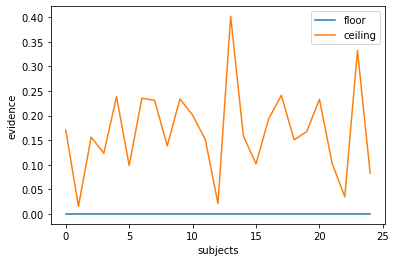

In [12]:

def getString(string,searchFor,end):
    return string.split(searchFor)[1].split(end)[0]

def getCeilFLoor(a):
    accs_rotation_container , evidence_rotation_container = a

    floors=[]
    ceils=[]
    for testRun in range(1,7):
        t=np.float(getString(evidence_rotation_container[testRun][2],"max(evidence_floor1,evidence_floor2)=","unique_Mark"))
        floors.append(t)
        t=np.float(getString(evidence_rotation_container[testRun][2],"evidence_ceil=","uniqueMark"))
        ceils.append(t)

    print(logit(np.mean(floors)))
    print(logit(np.mean(ceils)))
    return logit(np.mean(floors)),logit(np.mean(ceils))

floors=[]
ceilings=[]
for subject in subjects:
    floor,ceiling = getCeilFLoor(data[subject])
    floors.append(floor)
    ceilings.append(ceiling)

plt.plot(floors,label='floor')
plt.plot(ceilings,label="ceiling")
plt.legend()
plt.xlabel("subjects")
plt.ylabel("evidence")

